## Clustering Assignment

- An international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.
- Identifying the countries which are having significant issues like socio-economic and health factors so that we will make the decision is mostly related to the direst need of aid. 

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
#import all the necessary libraries

import numpy as np
import pandas as pd

# import Visualisation libraries

import matplotlib.pyplot as plt
import seaborn as sns

# imprort scikit-learn libraries

import sklearn
from sklearn.preprocessing import StandardScaler

# To perform KMeans clustering 
from sklearn.cluster import KMeans

# To calculate silhouette_score
from sklearn.metrics import silhouette_score

# To perform Hierarchical clustering

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

## 1. Reading and understanding the data:

In [3]:
# reading the cvs file

df = pd.read_csv(r"E:\DATA SCIENCE\Assignment\Clustering\Country-data.csv")
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
# Checking the shape of the data frame

df.shape

(167, 10)

In [5]:
# checking statistical information of data frame

df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [6]:
# Checking data types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [7]:
# checking for null values- columnswise

df.isnull().sum(axis= 0)

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [8]:
# checking for null values- rowswise

df.isnull().sum(axis= 1)

0      0
1      0
2      0
3      0
4      0
      ..
162    0
163    0
164    0
165    0
166    0
Length: 167, dtype: int64

- Here we observe that the data frame does not have null values by rows and column wise

## 2. Change the units of columns

- 'imports','exports' and 'health' spending from  percentage values to actual values of their GDP. Because the percentage values don't give a clear picture of that country. So we have to convert them.
- For ex. afghanistan and albania have looking  similar 'imports' percentange (44.9 and 48.6 % of gdpp) but their gdpp has a huge gap (553, 4090) so we doesnt get an accurate idea of which country is more developed than the other.

In [9]:
# Checking all columns

df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [10]:
# Converting 'exports','imports' and 'health' of spending percentages.

df['exports'] = df['exports']*df['gdpp']/100
df['imports'] = df['imports']*df['gdpp']/100
df['health'] = df['health']*df['gdpp']/100

In [11]:
# Inspecting the dataframe after converted columns

df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [12]:
# Hence this is unsupervervised learning (clustering) so we dont need lable i.e. 'country', so we dropping the 'country'

df_1= df.drop('country', axis=1)

In [13]:
# confirming the new data frame which doesn't  have the column 'country'

df_1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [14]:
feature = df_1.columns
for i in enumerate(feature):
    print(i)

(0, 'child_mort')
(1, 'exports')
(2, 'health')
(3, 'imports')
(4, 'income')
(5, 'inflation')
(6, 'life_expec')
(7, 'total_fer')
(8, 'gdpp')


**- Inspecting the data distribution of various columns 'child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp' by plotting them as follows:**

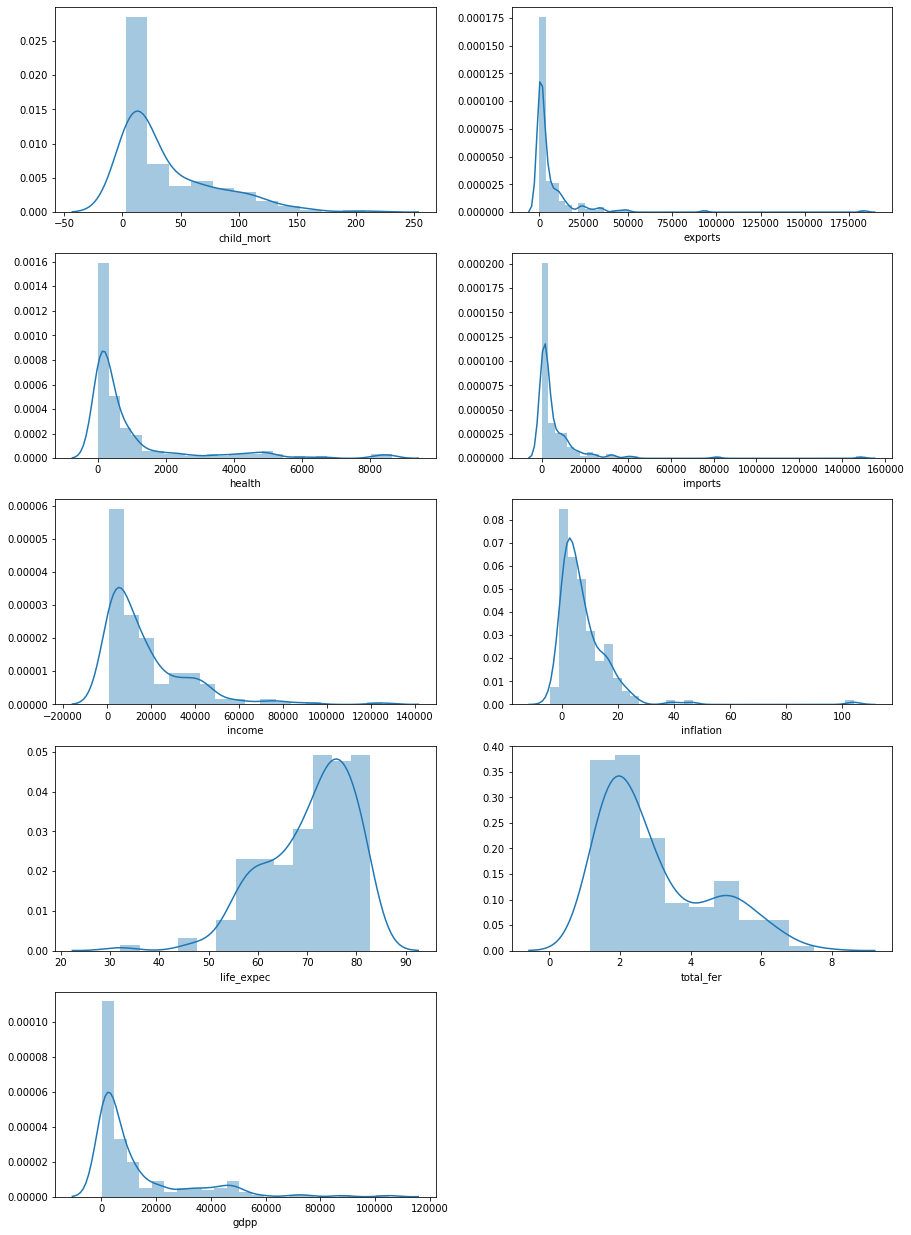

In [15]:
# plotting the data of various columns

plt.figure(figsize = (15,40))
for i in enumerate(feature):
    plt.subplot(9,2,i[0]+1)
    sns.distplot(df_1[i[1]])

### Inspecting the outliers (Outlier Treatment)

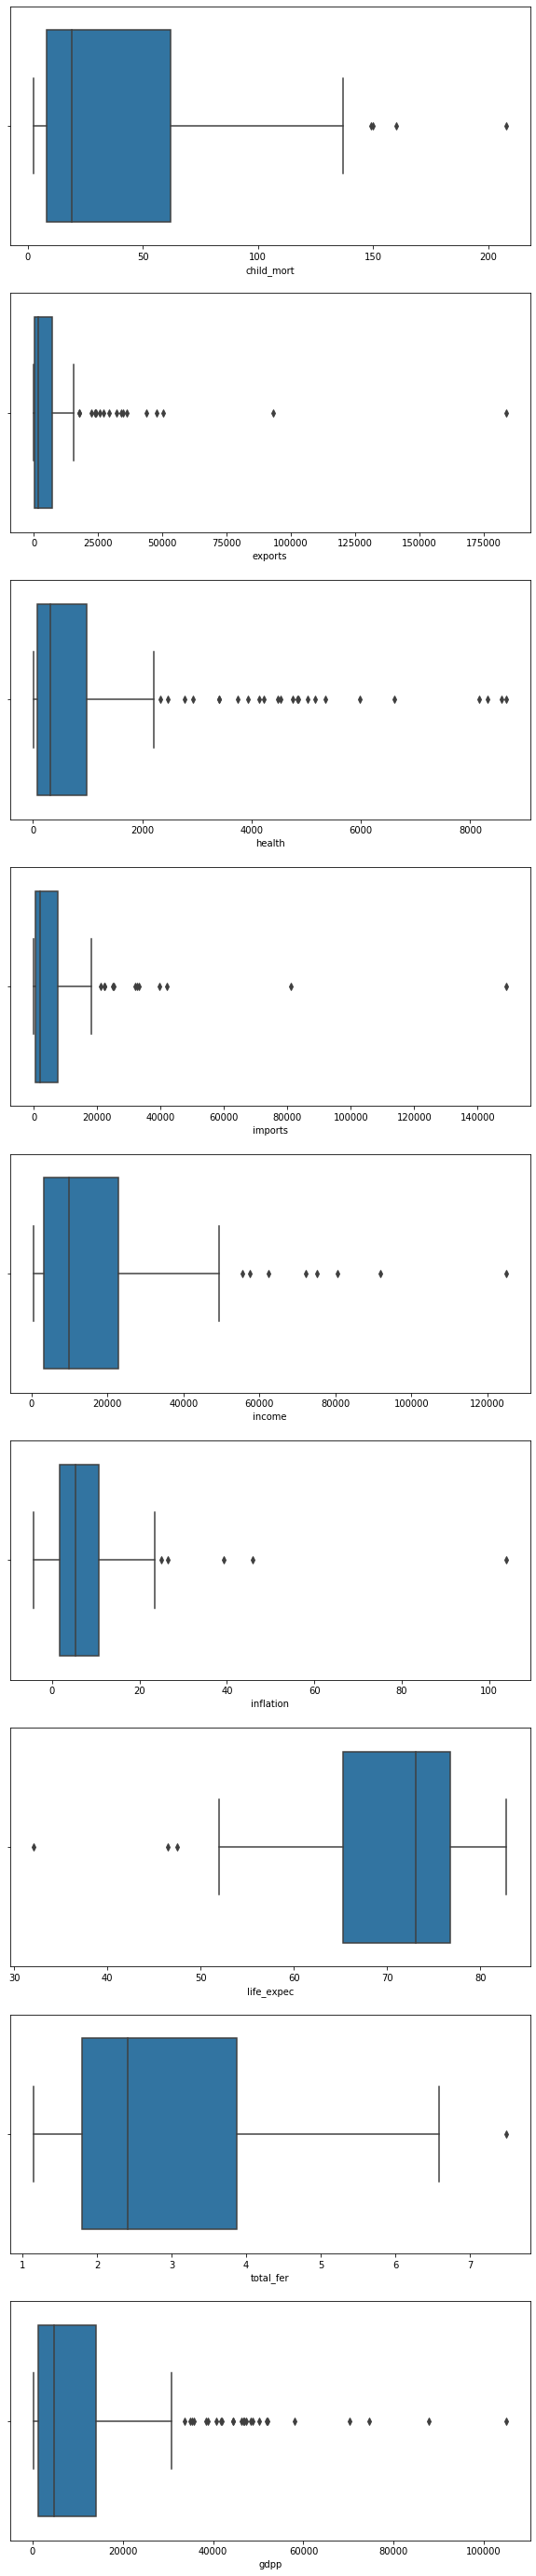

In [16]:
# Inspecting the outliers by plotting

plt.figure(figsize = (10,50))
features = df_1.columns
for i in enumerate(features):
    plt.subplot(9,1,i[0]+1)
    sns.boxplot(df_1[i[1]])

###  Outliers Treatment- Capping
- For lower range outliers, if we cap them we may loose the countries which are in requirement of the AID. So we don't cap the lower range outliers.
- In case of child_mort we need upper range outliers to anlalize the countries which are in requirement of the AID.

In [17]:
# capping of upper range outliers of 'exports' 

q1 = df_1['exports'].quantile(0.99)
df_1['exports'][df_1['exports']>=q1] = q1

# capping of upper range outliers of 'health' 

q2 = df_1['health'].quantile(0.99)
df_1['health'][df_1['health']>=q2] = q2

# capping of upper range outliers of 'imports' 

q3 = df['imports'].quantile(0.99)
df_1['imports'][df_1['imports']>=q3] = q3

# capping of upper range outliers of 'income' 

q4 = df_1['income'].quantile(0.99)
df_1['income'][df_1['income']>=q4] = q4

# capping of upper range outliers of 'inflation' 

q5 = df_1['inflation'].quantile(0.99)
df_1['inflation'][df_1['inflation']>=q5] = q5


# capping of upper range outliers of 'total_fer' 

q6 = df_1['total_fer'].quantile(0.99)
df_1['total_fer'][df_1['total_fer']>=q6] = q6

# capping of upper range outliers of 'gdpp' 

q7 = df_1['gdpp'].quantile(0.99)
df_1['gdpp'][df_1['gdpp']>=q7] = q7


In [18]:
# Checking the statistical information and presence of outliers

df_1.describe(percentiles = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95,1])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,6538.214776,1054.206622,5873.135222,16857.550898,7.380970,70.555689,2.942259,12756.826347
std,40.328931,11415.308590,1790.845342,9422.700869,17957.012855,7.793224,8.893172,1.498340,17430.208938
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
0%,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
10%,4.200000,110.224800,36.502560,211.005600,1524.000000,0.587800,57.820000,1.452000,593.800000
20%,6.320000,294.268000,55.060000,409.998800,2548.000000,1.408000,61.880000,1.630000,1146.000000
30%,10.380000,632.240000,108.357000,1021.992000,4488.000000,2.326000,66.280000,1.912000,2170.000000
40%,15.280000,1166.480000,190.044600,1500.288000,7320.000000,3.700000,70.060000,2.144000,3262.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000


## 3. Measuring the cluster tendency by calculating the Hopkins statistic 

In [19]:
# Calculating the Hopkins statistic

from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [20]:
hopkins(df_1)

0.8611646371322043

- The mean value of hopkins statistics is 90% so that the data is good enough for clustering

## 4. Scaling of data

In [21]:
# scaling by standard scaler method

scaler = StandardScaler()
df_s = scaler.fit_transform(df_1)

In [22]:
# converting numpy array to dataframe

df_s = pd.DataFrame(df_s, columns = df_1.columns)
df_s.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.569622,-0.566958,-0.598741,-0.851668,0.265002,-1.619092,1.926396,-0.702259
1,-0.538949,-0.473858,-0.440393,-0.413584,-0.386946,-0.372075,0.647866,-0.865054,-0.498726
2,-0.272833,-0.424000,-0.486271,-0.476100,-0.221053,1.122161,0.670423,-0.034983,-0.477434
3,2.007808,-0.381249,-0.534088,-0.463973,-0.612045,1.932987,-1.179234,2.153997,-0.530950
4,-0.695634,-0.086742,-0.178410,0.139728,0.125254,-0.764618,0.704258,-0.543736,-0.032042


## 5. Clustering 
### 5.1 K-Mean Clustering

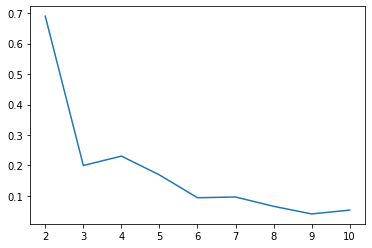

In [23]:
# plotting the Elbow curve by silhouette_score

ss = []
for k in range(2, 11):
    kmean = KMeans(n_clusters = k).fit(df_s)
    ss.append([k, silhouette_score(df_1, kmean.labels_)])
temp = pd.DataFrame(ss)    
plt.plot(temp[0], temp[1])

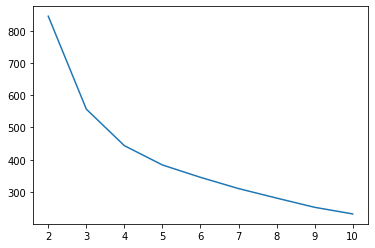

In [24]:
# plotting the ssd (sum of squared distances) curve

ssd = []
for k in range(2, 11):
    kmean = KMeans(n_clusters = k).fit(df_s)
    ssd.append([k, kmean.inertia_])
    
temp = pd.DataFrame(ssd)
plt.plot(temp[0], temp[1])

#### here we are considering 4 cluster points based on elbow curve.

In [25]:
# number of clusters (K=4)
# Final Kmean Clustering

kmean = KMeans(n_clusters = 4, random_state = 50)
kmean.fit(df_s)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=50, tol=0.0001, verbose=0)

In [26]:
# copying the original dataframe to kmean dataframe

df_kmean = df.copy()

In [27]:
# creating a new dataframe with 'lable' 

label  = pd.DataFrame(kmean.labels_, columns= ['label'])
label.head()

,label
0,1
1,2
2,2
3,1
4,2


In [28]:
# merging lable with df_kmean 

df_kmean = pd.concat([df_kmean, label], axis =1)
df_kmean.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,2
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,2
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,2


In [29]:
# checking the value counts for each clusters 

df_kmean.label.value_counts()

2    82
1    48
0    28
3     9
Name: label, dtype: int64

## Visualising the clusters

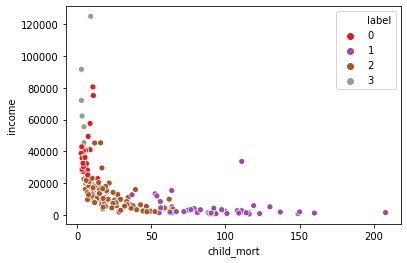

In [30]:
# Plotting the clusters with 'child_mort' and 'income'

sns.scatterplot(x = 'child_mort', y = 'income', hue = 'label', data = df_kmean, palette = 'Set1')

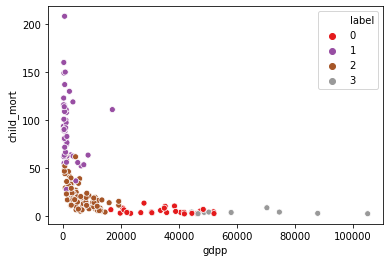

In [31]:
# Plotting the clusters with 'gdpp' and 'child_mort'

sns.scatterplot(x = 'gdpp', y = 'child_mort', hue = 'label', data = df_kmean, palette = 'Set1')

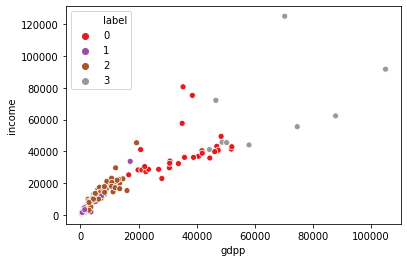

In [32]:
# Plotting the clusters with 'gdpp' and 'income'

sns.scatterplot(x = 'gdpp', y = 'income', hue = 'label', data = df_kmean, palette = 'Set1')

## Clsuter Profiling for `'gdpp', 'income' and 'child_mort'`

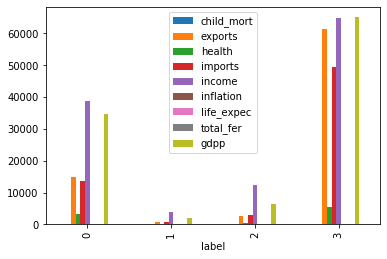

In [33]:
# Making sense out of the clsuters

df_kmean.groupby('label').mean().plot(kind = 'bar')

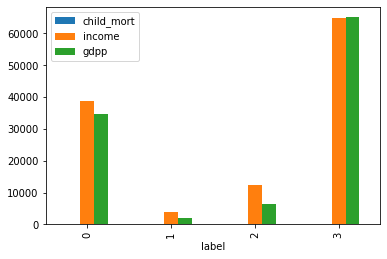

In [34]:
# Hence we doing cluster profiling for 'gdpp', 'income' and 'child_mort', so we dropping the remaining coumns

df_kmean.drop(['exports', 'health', 'imports', 'inflation', 'life_expec', 'total_fer'], axis = 1).groupby('label').mean().plot(kind = 'bar')

In [53]:
# Filter the data for that clsuter

df_kmean[df_kmean['label'] == 0].head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
7,Australia,4.8,10276.2,4530.87,10847.1,41400,1.160,82.0,1.93,51900,0
8,Austria,4.3,24059.7,5159.00,22418.2,43200,0.873,80.5,1.44,46900,0
10,Bahamas,13.8,9800.0,2209.20,12236.0,22900,-0.393,73.8,1.86,28000,0
11,Bahrain,8.6,14386.5,1028.79,10536.3,41100,7.440,76.0,2.16,20700,0
23,Brunei,10.5,23792.2,1002.52,9884.0,80600,16.700,77.1,1.84,35300,0


In [54]:
# sort the data frame with Low 'income', Low 'gdpp' and High 'Child_mort'

df_kmean[df_kmean['label'] == 1].sort_values(by = ['child_mort', 'income', 'gdpp'], ascending = [False, True, True]).head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
66,Haiti,208.0,101.286,45.7442,428.314,1500,5.45,32.1,3.33,662,1
132,Sierra Leone,160.0,67.032,52.2690,137.655,1220,17.20,55.0,5.20,399,1
32,Chad,150.0,330.096,40.6341,390.195,1930,6.39,56.5,6.59,897,1
31,Central African Republic,149.0,52.628,17.7508,118.190,888,2.01,47.5,5.21,446,1
97,Mali,137.0,161.424,35.2584,248.508,1870,4.37,59.5,6.55,708,1


## 5.2 Hierarchical Clustering

###  `by using single linkage`

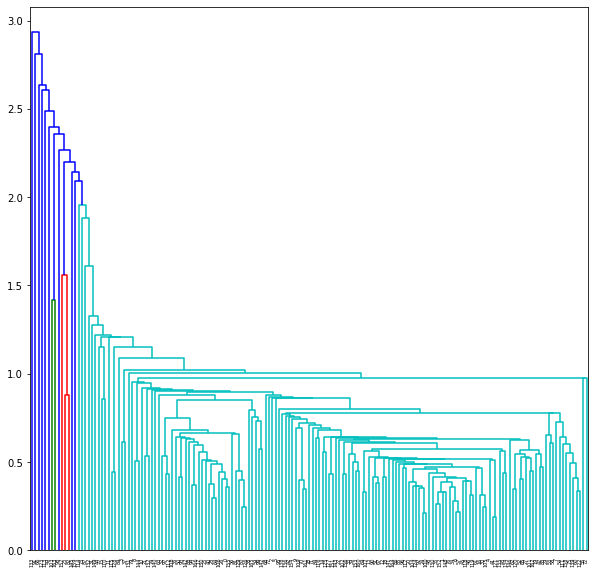

In [47]:
# single linkage
fig = plt.figure(figsize = (10,10))
mergings = linkage(df_s, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

### `by using complete linkage`

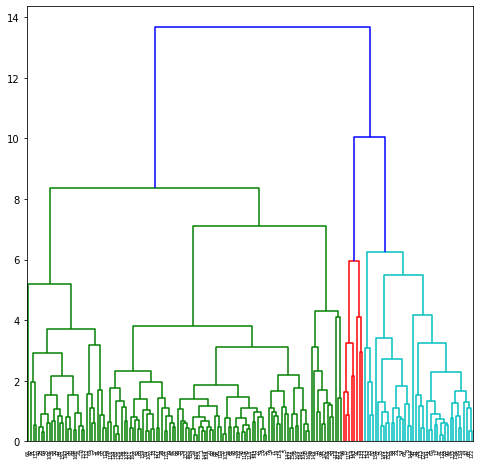

In [51]:
# complete linkage
fig = plt.figure(figsize = (8,8))
mergings = linkage(df_s, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

### here we are considering 4 clusters for analysis so we need to cut the dendogram tree at 4 

In [39]:
# for 4 clusters

cluster_labels = cut_tree(mergings, n_clusters=4).reshape(-1, )
cluster_labels

array([0, 1, 1, 0, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 1, 3, 1, 0, 1, 1, 1, 0,
       1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 2, 2, 2,
       3, 1, 1, 1, 1, 1, 0, 2, 1, 2, 2, 1, 0, 1, 2, 1, 2, 1, 1, 0, 0, 1,
       0, 2, 2, 1, 1, 1, 1, 3, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 0,
       0, 2, 2, 3, 1, 0, 0, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       3, 2, 0, 1, 3, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2,
       0, 3, 2, 2, 1, 0, 2, 2, 1, 1, 1, 1, 2, 3, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 0])

In [40]:
# assign cluster labels to dataframe

df['cluster_labels'] = cluster_labels
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,2


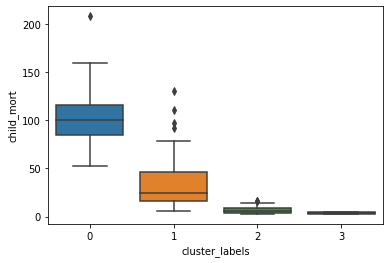

In [41]:
# ploting the 'cluster_labels' with 'child_mort'

sns.boxplot(x='cluster_labels', y='child_mort', data=df)

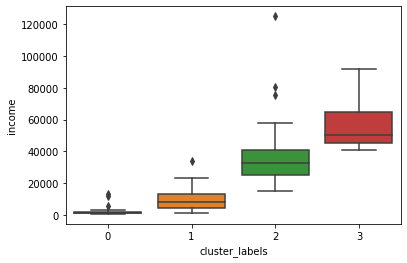

In [42]:
# plotting 'cluster_labels' with 'income'

sns.boxplot(x='cluster_labels', y='income', data=df)

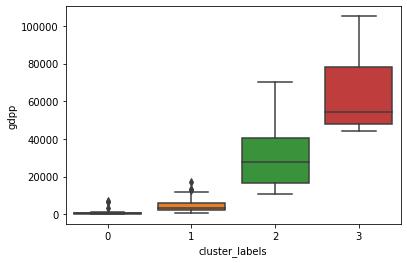

In [43]:
# plotting 'cluster_labels' with 'gdpp'

sns.boxplot(x='cluster_labels', y='gdpp', data=df)

## Clsuter Profiling

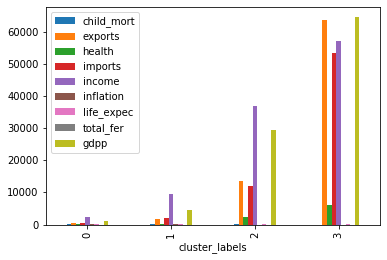

In [44]:
# Making sense out of the clsuters

df.groupby('cluster_labels').mean().plot(kind = 'bar')

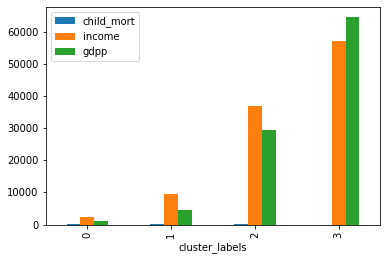

In [45]:
# Hence we are doing cluster profiling for 'gdpp', 'income' and 'child_mort', so we dropping the remaining coumns

df.drop(['exports', 'health', 'imports', 'inflation', 'life_expec', 'total_fer'], axis = 1).groupby('cluster_labels').mean().plot(kind = 'bar')

In [46]:
# sort the data frame with Low 'income', Low 'gdpp' and High 'Child_mort'

df[df['cluster_labels'] == 0].sort_values(by = ['child_mort', 'income', 'gdpp'], ascending = [False, True, True]).head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels
66,Haiti,208.0,101.286,45.7442,428.314,1500,5.45,32.1,3.33,662,0
132,Sierra Leone,160.0,67.032,52.2690,137.655,1220,17.20,55.0,5.20,399,0
32,Chad,150.0,330.096,40.6341,390.195,1930,6.39,56.5,6.59,897,0
31,Central African Republic,149.0,52.628,17.7508,118.190,888,2.01,47.5,5.21,446,0
97,Mali,137.0,161.424,35.2584,248.508,1870,4.37,59.5,6.55,708,0


As per K_means Clustering (cluster number 1),the following countries require aid by considering the socio – economic factor:

1. Haiti
2. Sierra Leone
3. Chad
4. Central African Republic
5. Mali

As per Heirarchical Clustering (cluster number 0),the following countries require aid by considering the socio – economic factor:

1. Haiti
2. Sierra Leone
3. Chad
4. Central African Republic
5. Mali